In [1]:
import pandas as pd
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline
import matplotlib.pyplot as plt
from matplotlib import gridspec




In [4]:
def get_smooth(x,y):
    # 300 represents number of points to make between T.min and T.max
    xnew = np.linspace(x.min(), x.max(), 300) 
    # type: BSpline
    spl = make_interp_spline(x, y, k=1)
    power_smooth = spl(xnew)
    return(xnew, power_smooth)

def bining_last_half(datain, nbin, binstr, binend):
    # do bining for last half
    _datain=list(datain)
    n0 = int(len(_datain)/2)
    _datain = _datain[n0:]

    hist, bins = np.histogram(_datain, bins=nbin, range=[binstr, binend], density=False)
    hist_n = hist / sum(hist)

    # manipulate bin
    bin_shift = (bins[1] - bins[0]) / 2
    nbin_center = len(bins) - 1
    xbin = bins + bin_shift
    xbin = xbin[0:nbin_center]

    return xbin, hist_n

def calc_np_std(list):
    _std=np.std(np.array(list))
    return _std

def calc_np_ave(list):
    _ave=np.mean(np.array(list))
    return _ave

def plot_evol_hist_stat(t=None,datain=None,
                        nbin=30, binstr=0, binend=8,
                        title='',
                        title_1='', title_2='', xlabel_1='', ylabel_1='',
                        xlabel_2='', ylabel_2='',
                        data_label='',
                        outfilename=None,
                        colorin="red"):

    t=t
    style="p"
    n = len(datain)
    datain=list(datain)
    #colorin="red"

    #if n > 900:
    npoint = 100
    n0 = int(n / 3)
    n1 = int(n / 3 * 2)
    n2 = int(n) - npoint*2
    n3 = int(n) - npoint
    xx = (1, 2, 3, 4)
    yy = [calc_np_ave(datain[n0:n1]), calc_np_ave(datain[n1:n2]),
              calc_np_ave(datain[n2:n3]), calc_np_ave(datain[n3:n])]
    yyerr = [calc_np_std(datain[n0:n1]), calc_np_std(datain[n1:n2]),
              calc_np_std(datain[n2:n3]), calc_np_std(datain[n3:n])]

    #t = np.arange(len(datain))
    xbin, hist_n = bining_last_half(datain, nbin, binstr, binend)

    # smooth plot
    x, y = get_smooth(xbin, hist_n)

    # figure parameters
    nrow = 1
    ncol = 3
    figheight = 2.5
    figwidth = 8
    linewidth = 1

    fig, axs = plt.subplots(nrow, ncol, figsize=(figwidth, figheight))
    fig.suptitle(title, fontsize="x-large")
    fig.subplots_adjust(hspace=0.05, wspace=0.1)

    gs = gridspec.GridSpec(nrow, ncol, width_ratios=[6, 1, 2])

    ax1 = plt.subplot(gs[0])
    if style=='l':
        ax1.plot(t, datain, markersize=1, lw=linewidth, label=data_label,color=colorin)
    elif style=='p':
        ax1.plot(t,datain,'bo',markersize=1,lw=linewidth,label=data_label,color=colorin)
    ax1.set_xlabel(xlabel_1)
    ax1.set_ylabel(ylabel_1)
    ax1.set_title(title_1)
    ax1.grid(True, linestyle='dotted', linewidth=0.2)
    ax1.legend(loc='upper left', frameon=False)
    ax1.set_ylim(binstr, binend)
    ax1.tick_params(top=True, bottom=True, left=True, right=True,
                    labelleft=True, labelbottom=True)


    ax2 = plt.subplot(gs[1])
    ax2.plot(y, x, lw=linewidth, label=data_label,color=colorin)
    ax2.set_xlabel(xlabel_2)
    ax2.set_ylabel(ylabel_2)
    ax2.set_title(title_2)
    ax2.grid(True, linestyle='dotted', linewidth=0.2)
    # ax2.legend(loc='upper right', frameon=False)
    ax2.set_ylim(binstr, binend)
    ax2.tick_params(top=True, bottom=True, left=True, right=True,
                    labelleft=False, labelbottom=True)

    ax3 = plt.subplot(gs[2])
    #ax3.errorbar(xx, yy, 0, yyerr'bo', fmt='o', lw=linewidth, label=data_label)
    ax3.errorbar(xx, yy, yyerr, 0, fmt='o',color=colorin)
    ax3.set_xlabel('')
    ax3.set_ylabel('')
    ax3.set_title('')
    ax3.grid(True, linestyle='dotted', linewidth=0.2)
    # ax3.legend(loc='upper right', frameon=False)
    ax3.set_ylim(binstr, binend)
    ax3.set_xlim(0, 5)
    ax3.tick_params(top=True, bottom=True, left=True, right=True,
                    labelleft=False, labelbottom=False)

    #plt.show()
   # plt.savefig(outfilename+".png", dpi=300, bbox_inches='tight')


In [15]:
def wrap_plots(rec,lignad,jobname,comp):
    df =pd.read_hdf('/home/khlee/desmond/output/'+rec+'/'+lignad+'/'+jobname+'/output/gpcr_euler.hdf','df')
    # t
    t=range(len(df))
    # raw data in list
    datain=list(df[comp])
    plot_evol_hist_stat(t,datain,binstr=-180, binend=180)
    
def wrap_plots_alpha5(rec,lignad,jobname,comp):
    df =pd.read_hdf('/home/khlee/desmond/output/'+rec+'/'+lignad+'/'+jobname+'/output/gpcr_euler_alpha5.hdf','df')
    # t
    t=range(len(df))
    # raw data in list
    datain=list(df[comp])
    plot_evol_hist_stat(t,datain,binstr=-180, binend=180)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


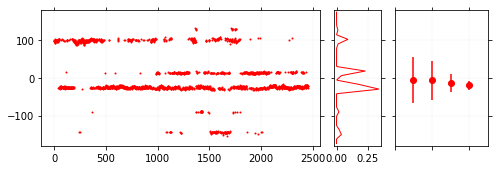

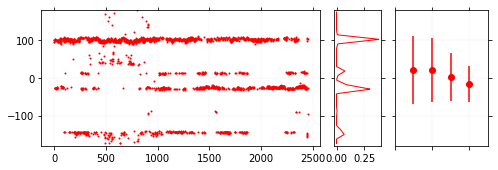

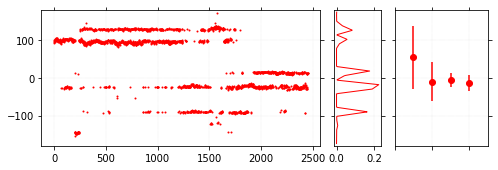

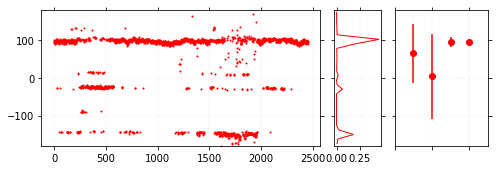

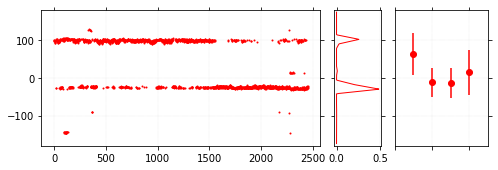

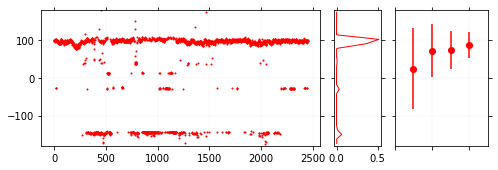

In [16]:
wrap_plots("d2gi","bro","d2gi_bro","alpha")
wrap_plots("d2gi","bro","d2gi_bro.1","alpha")
wrap_plots("d2gi","bro","d2gi_bro.2","alpha")
wrap_plots("d2gi","bro","d2gi_bro.3","alpha")
wrap_plots("d2gi","bro","d2gi_bro.4","alpha")
wrap_plots("d2gi","bro","d2gi_bro.5","alpha")

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


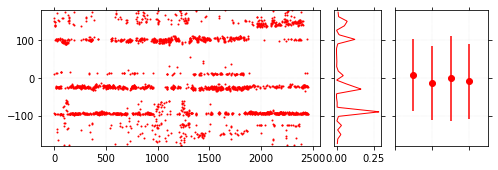

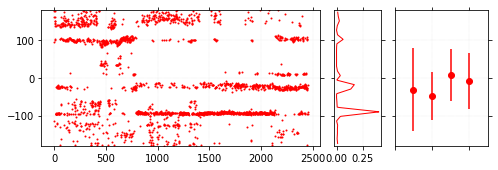

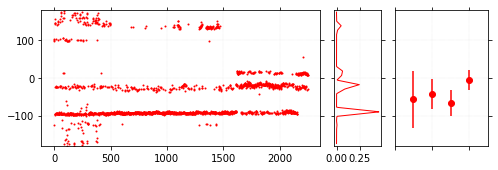

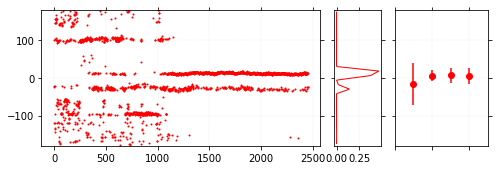

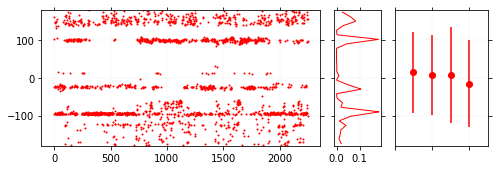

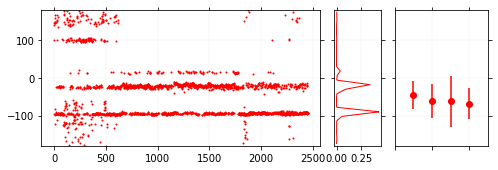

In [17]:
wrap_plots("d2go","bro","d2go_bro","alpha")
wrap_plots("d2go","bro","d2go_bro.1","alpha")
wrap_plots("d2go","bro","d2go_bro.2","alpha")
wrap_plots("d2go","bro","d2go_bro.3","alpha")
wrap_plots("d2go","bro","d2go_bro.4","alpha")
wrap_plots("d2go","bro","d2go_bro.5","alpha")

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


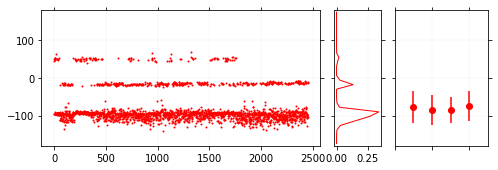

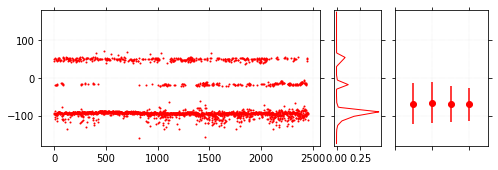

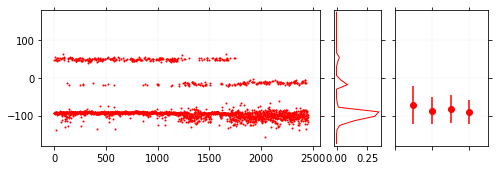

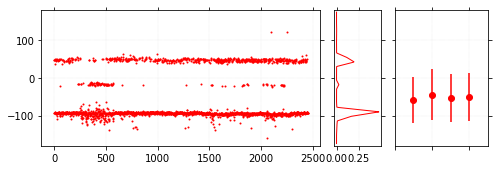

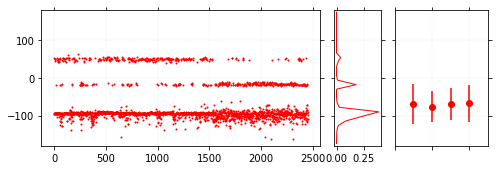

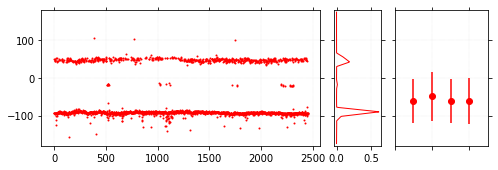

In [19]:
wrap_plots_alpha5("d2gi","bro","d2gi_bro","alpha")
wrap_plots_alpha5("d2gi","bro","d2gi_bro.1","alpha")
wrap_plots_alpha5("d2gi","bro","d2gi_bro.2","alpha")
wrap_plots_alpha5("d2gi","bro","d2gi_bro.3","alpha")
wrap_plots_alpha5("d2gi","bro","d2gi_bro.4","alpha")
wrap_plots_alpha5("d2gi","bro","d2gi_bro.5","alpha")

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


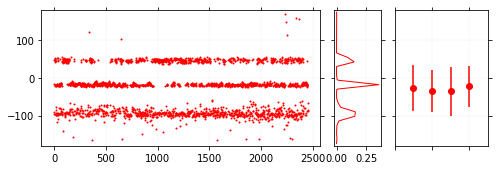

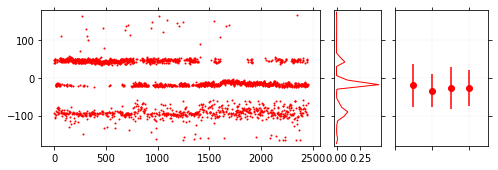

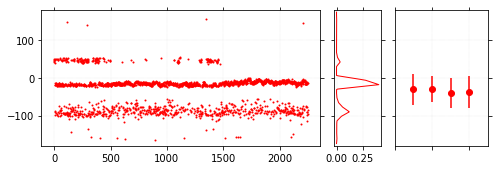

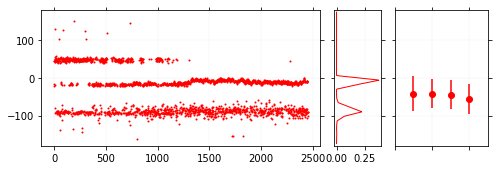

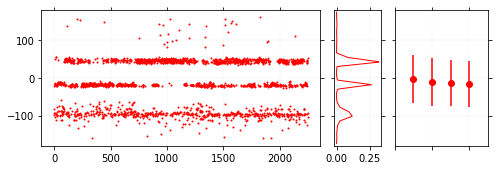

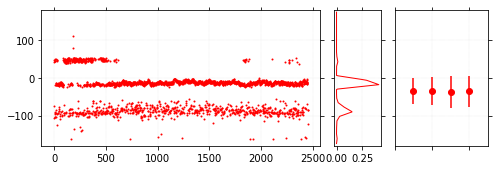

In [20]:
wrap_plots_alpha5("d2go","bro","d2go_bro","alpha")
wrap_plots_alpha5("d2go","bro","d2go_bro.1","alpha")
wrap_plots_alpha5("d2go","bro","d2go_bro.2","alpha")
wrap_plots_alpha5("d2go","bro","d2go_bro.3","alpha")
wrap_plots_alpha5("d2go","bro","d2go_bro.4","alpha")
wrap_plots_alpha5("d2go","bro","d2go_bro.5","alpha")

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


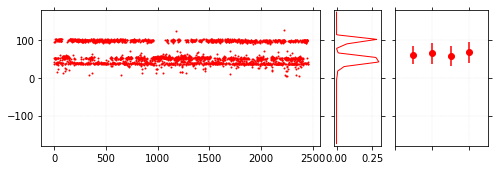

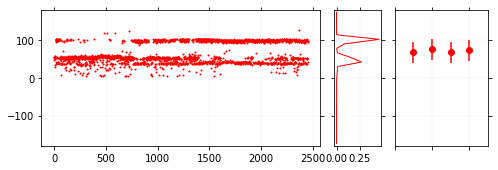

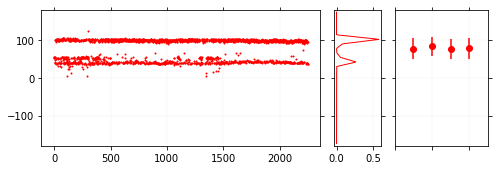

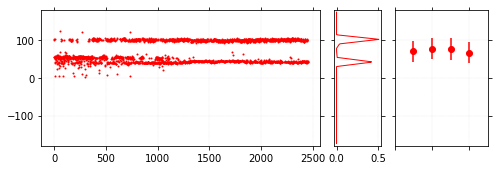

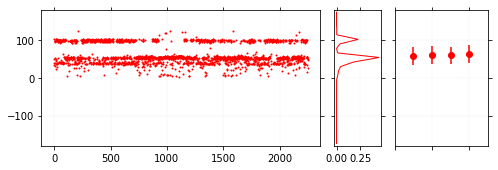

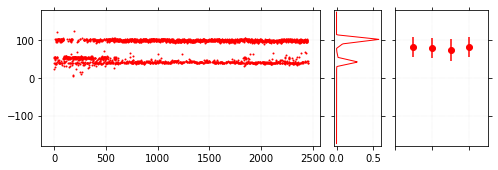

In [21]:
wrap_plots_alpha5("d2go","bro","d2go_bro","beta")
wrap_plots_alpha5("d2go","bro","d2go_bro.1","beta")
wrap_plots_alpha5("d2go","bro","d2go_bro.2","beta")
wrap_plots_alpha5("d2go","bro","d2go_bro.3","beta")
wrap_plots_alpha5("d2go","bro","d2go_bro.4","beta")
wrap_plots_alpha5("d2go","bro","d2go_bro.5","beta")

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


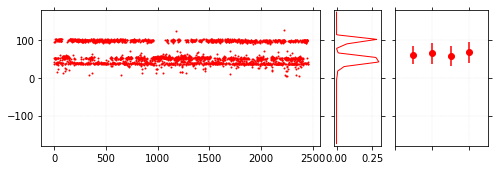

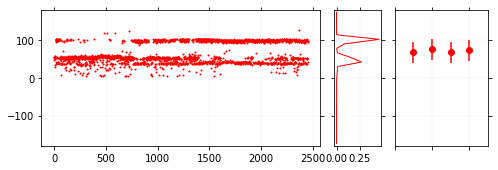

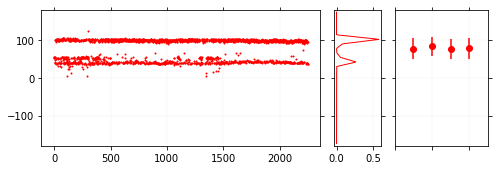

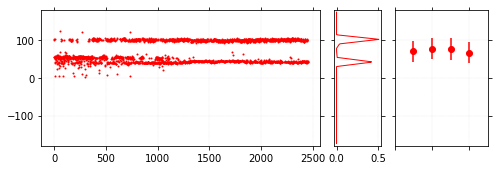

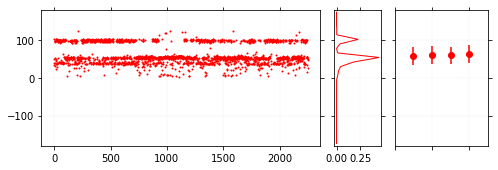

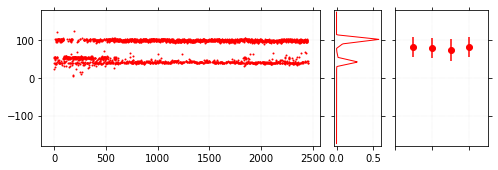

In [22]:
wrap_plots_alpha5("d2go","bro","d2go_bro","beta")
wrap_plots_alpha5("d2go","bro","d2go_bro.1","beta")
wrap_plots_alpha5("d2go","bro","d2go_bro.2","beta")
wrap_plots_alpha5("d2go","bro","d2go_bro.3","beta")
wrap_plots_alpha5("d2go","bro","d2go_bro.4","beta")
wrap_plots_alpha5("d2go","bro","d2go_bro.5","beta")

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


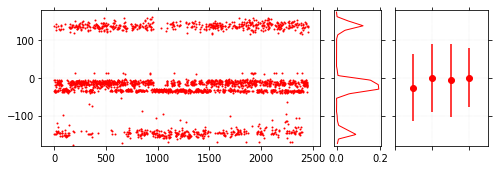

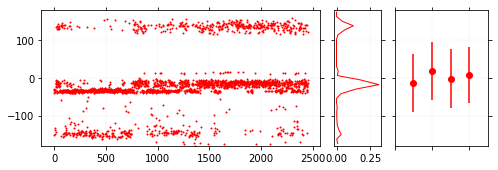

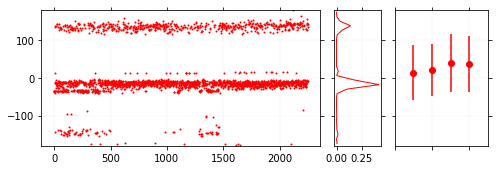

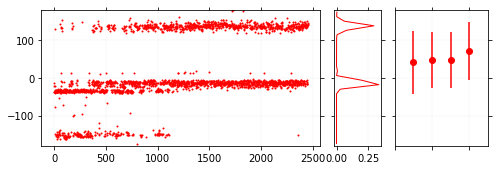

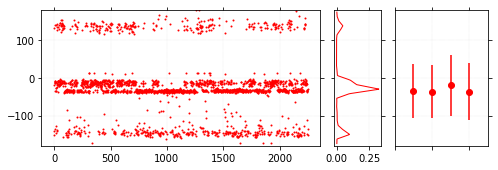

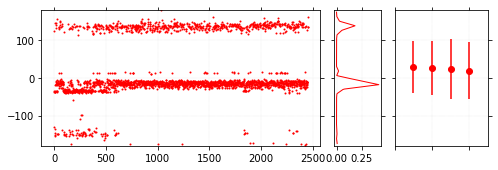

In [23]:
wrap_plots_alpha5("d2go","bro","d2go_bro","gamma")
wrap_plots_alpha5("d2go","bro","d2go_bro.1","gamma")
wrap_plots_alpha5("d2go","bro","d2go_bro.2","gamma")
wrap_plots_alpha5("d2go","bro","d2go_bro.3","gamma")
wrap_plots_alpha5("d2go","bro","d2go_bro.4","gamma")
wrap_plots_alpha5("d2go","bro","d2go_bro.5","gamma")

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


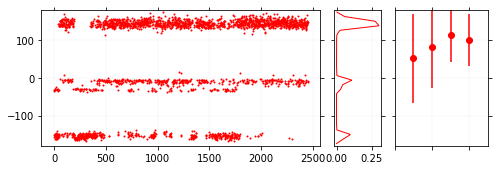

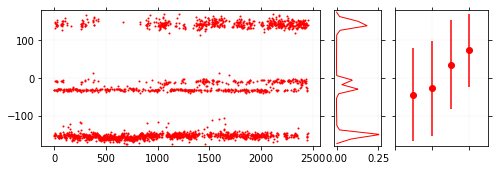

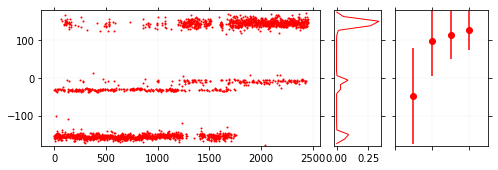

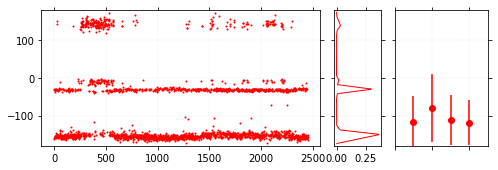

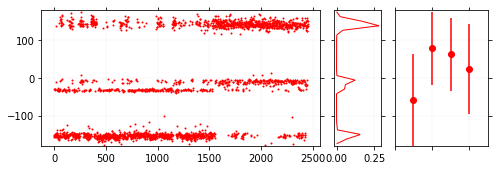

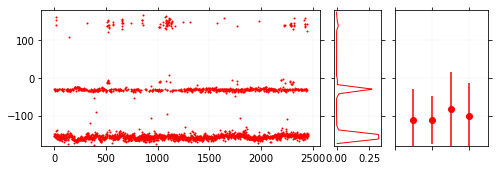

In [24]:
wrap_plots_alpha5("d2gi","bro","d2gi_bro","gamma")
wrap_plots_alpha5("d2gi","bro","d2gi_bro.1","gamma")
wrap_plots_alpha5("d2gi","bro","d2gi_bro.2","gamma")
wrap_plots_alpha5("d2gi","bro","d2gi_bro.3","gamma")
wrap_plots_alpha5("d2gi","bro","d2gi_bro.4","gamma")
wrap_plots_alpha5("d2gi","bro","d2gi_bro.5","gamma")